# ACML Assignment 1

In [1]:
import numpy as np

### Create the training data 

In [2]:
inputs = []

for i in range(8):
    input = np.zeros(((8+1),1)) # +1 is the bias
    input[0] = 1 # bias at the beginning of the input
    input[i+1] = 1
    inputs.append(input)

### Define functions

In [3]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

def softmax(x):
    e = np.exp(x)
    return(e/e.sum())

def argmax(x): 
    a2_index = np.argmax(x)
    a2 = np.zeros(8)
    a2[a2_index] = 1
    return(a2)

def forward_prop(a0, W1, W2):
    a1 = sigmoid(np.dot(W1, a0)) 
    a1 = np.insert(a1, 0, 1) # insert bias to make it (4x1)
    a2 = sigmoid(np.dot(W2, a1))
    return(a1, a2) # returns (4x1), (8x1)

def back_prop(a0, a1, a2, W1, W2):
    
    cost_MSE = np.sum(np.square(a2 - a0))

    # compute the deltas for layer 2 and 1
    delta2 = (a2 - a0) # deltas in layer 2 (output)

    delta1 = a1 * (np.ones(4) - a1) * np.dot(W2.T, delta2) # deltas in layer 1 (hidden)
    #         (4x1) * ((4x1) - (4x1))  *  ((4x8) . (8x1))   = (4x1)
    #                                          (4x1)

    # compute the partial derivatives for weigthts 2
    deriv_W_2 = np.dot(delta2.reshape(8,1), a1.reshape(1,4))

    # compute the partial derivatives for weights 1
        ## insert bias to a0
    a0_with_bias = np.insert(a0, 0, 1)
    a0_with_bias = a0_with_bias
    
        ## delete bias for delta1
    delta1 = np.delete(delta1, 0)
    deriv_W_1 = np.dot(delta1.reshape(3, 1), a0_with_bias.reshape(1, 9))
    
    return(deriv_W_1, deriv_W_2, cost_MSE)


def train(inputs, W1, W2, batch_size, epochs, lr, weight_decay):
    loss = list()
    # loop over number of iterations
    for i in range(epochs):

        # loop over batch size
        deriv1_outer = np.zeros((3,9))
        deriv2_outer = np.zeros((8,4))
        for m in range(batch_size): 
            
            # select a random training sample
            train_sample = inputs[np.random.randint(0, 8)]
            
            # perform forward propagation
            ta1, ta2 = forward_prop(train_sample, W1, W2)
            
            # perform backward propagation
            y = np.delete(train_sample, 0)
            deriv1, deriv2, cost = back_prop(y, ta1, ta2, W1, W2)
            
            # add the partial derivatives to the batch derivatives
            deriv1_outer = deriv1_outer + deriv1
            deriv2_outer = deriv2_outer + deriv2
            loss.append(cost)

        W1_new = W1 - (lr * ((1/batch_size) * deriv1_outer + weight_decay * W1))
        W2_new = W2 - (lr * ((1/batch_size) * deriv2_outer + weight_decay * W2))
        W1_new[:,0] = W1[:,0] - lr * (1/batch_size) * deriv1_outer[:,0]
        W2_new[:,0] = W2[:,0] - lr * (1/batch_size) * deriv2_outer[:,0]
        W1 = W1_new
        W2 = W2_new
    return(W1, W2, loss)

### Parameters and training of model

In [57]:
# Initialize Weights
W1 = np.random.normal(0, 0.01, 3*9).reshape(3, 9) # 3x9 matrix
W2 = np.random.normal(0, 0.01, 8*4).reshape(8, 4) # 8x4 matrix

# Train the model
W1, W2, loss = train(
    inputs = inputs,
    W1 = W1, W2 = W2, 
    batch_size = 5, epochs = 20000, 
    lr = 0.1, weight_decay = 0.0001)


### Plotting the model

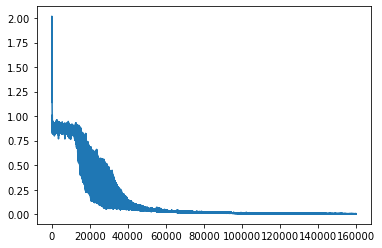

In [58]:
import matplotlib.pyplot as plt
plt.plot((list(range(len(loss)))), loss)
plt.show()

### Prediction with the model

In [40]:
# select some input
index = 3
print(np.delete(inputs[index], 0).reshape(1,-1)[0])
_, output = forward_prop(inputs[index], W1, W2)
print(output)
print(argmax(output))
print((argmax(output) == np.delete(inputs[index], 0).reshape(1,-1)[0]))

# indeed the model predicted well for this input

[0. 0. 0. 1. 0. 0. 0. 0.]
[4.22524352e-02 3.27291633e-04 6.03280287e-02 8.57703331e-01
 4.38480493e-06 8.70205964e-04 4.19675593e-04 4.51771883e-02]
[0. 0. 0. 1. 0. 0. 0. 0.]
[ True  True  True  True  True  True  True  True]
